# Google Play Store Apps Data Analysis

### How can Android app developing companies increase revenue by 25% over a year by developing applications that are more successful 


### The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

### The dataset 10841 rows and the file could be downloaded from:  https://www.kaggle.com/lava18/google-play-store-apps

## Part I: <span style="color:blue">Descriptive Statistics</span>

##  <span style="color:purple">Import Required Libraries</span> 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline
import statsmodels.api as sm
import matplotlib as mpl

##  <span style="color:purple">Reading the Dataset</span> 

In [4]:
app_data= pd.read_csv("/Users/likhita/Desktop/SpringBoard/Capstone 2/googleplaystore.csv")

In [5]:
type(app_data)

pandas.core.frame.DataFrame

In [6]:
app_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [7]:
app_data.shape

(10841, 13)

##  <span style="color:purple">Data Cleaning</span> 

In [8]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 ### <b> Check the number of null values in each Column </b>

In [9]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Row 10472 is a wrong entry. Drop the row

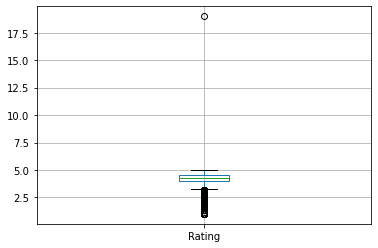

In [10]:
app_data.boxplot()

In [11]:
app_data[app_data.Rating> 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
app_data.drop([10472], inplace= True)

In [13]:
app_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


### Data Imputation and Manipulation
 ###   Fill the null values with appropriate aggregate values [mean, median or mode]

In [14]:
#Mean Rating- since the rating is right skewed it is better to impute mean value
app_data['Rating'].mean()

4.191757420456978

In [15]:
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())

In [16]:
app_data.Rating= app_data['Rating'].transform(impute_median)

In [17]:
app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [18]:
#finding the mode value of type, current version and andreoid version
print(app_data['Type'].mode())
print(app_data['Current Ver'].mode())
print(app_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [19]:
# Fill all other missing categorical values with mode
app_data['Type'].fillna(str(app_data['Type'].mode().values[0]),inplace=True)
app_data['Current Ver'].fillna(str(app_data['Current Ver'].mode().values[0]),inplace=True)
app_data['Android Ver'].fillna(str(app_data['Android Ver'].mode().values[0]),inplace=True)

In [20]:
app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Convert Reviews, Price, Size and Installs columns to numeric values

In [21]:
#Convert price to float
app_data['Price']=app_data['Price'].str.replace('$','').astype('float')

In [22]:
#Convert Reviews to int
app_data['Reviews']=app_data['Reviews'].astype('int')

In [23]:
#Convert Installs to float
app_data['Installs']=app_data['Installs'].str.replace(',','').str.replace('+','').astype('int')

In [24]:
#Convert Size to float
app_data['Size']=app_data['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [25]:
#Convert Last Updated to datetime format
app_data['Last Updated']=pd.to_datetime(app_data['Last Updated'])

In [26]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


In [27]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### Summary Statistics after Data Cleaning

In [28]:

app_data.describe()

,Rating,Reviews,Size,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.815209e+07,1.546434e+07,1.027368
std,0.480342,2.927761e+06,2.217061e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,2.600000e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,9.200000e+06,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,2.600000e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


## <span style="color:purple">Insights</span> 
##  <span style="color:purple">Exploratory Data Analysis</span> 


### Android market breakdown- Comparing the ratings, reviews  price and Installs for each app category 

In [29]:
#grouping Rating reviews Installs and Price by category
grp= app_data.groupby('Category')
x= grp['Rating'].agg(np.mean)
y= grp['Reviews'].agg(np.mean)
z= grp['Price'].agg(np.mean)
p= grp['Installs'].agg(np.sum)


In [30]:
app_data['Rating'].mean()

4.206476014760287

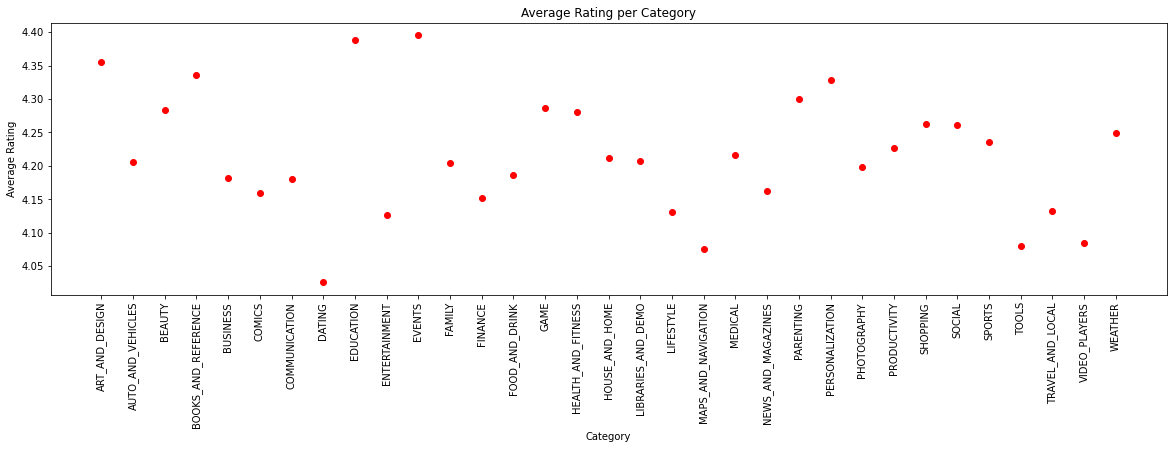

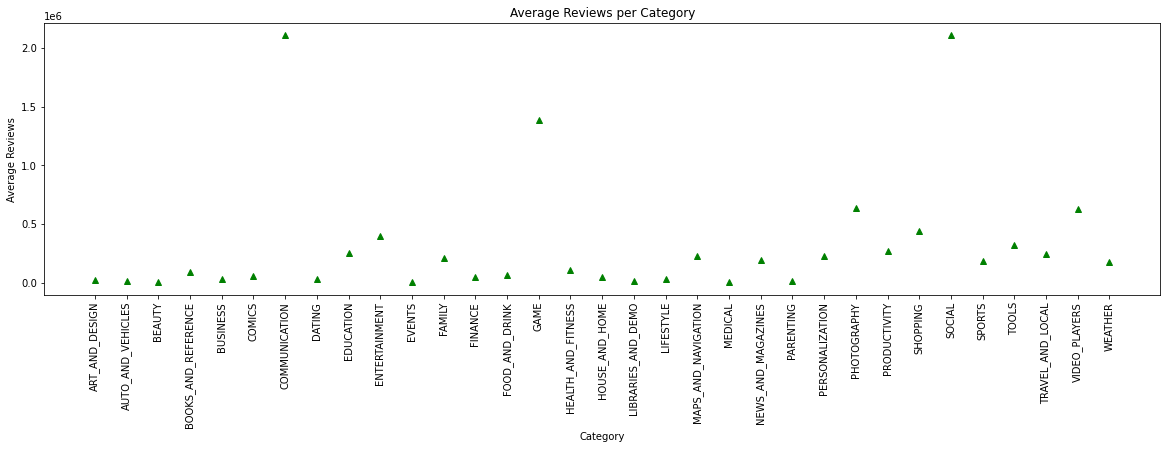

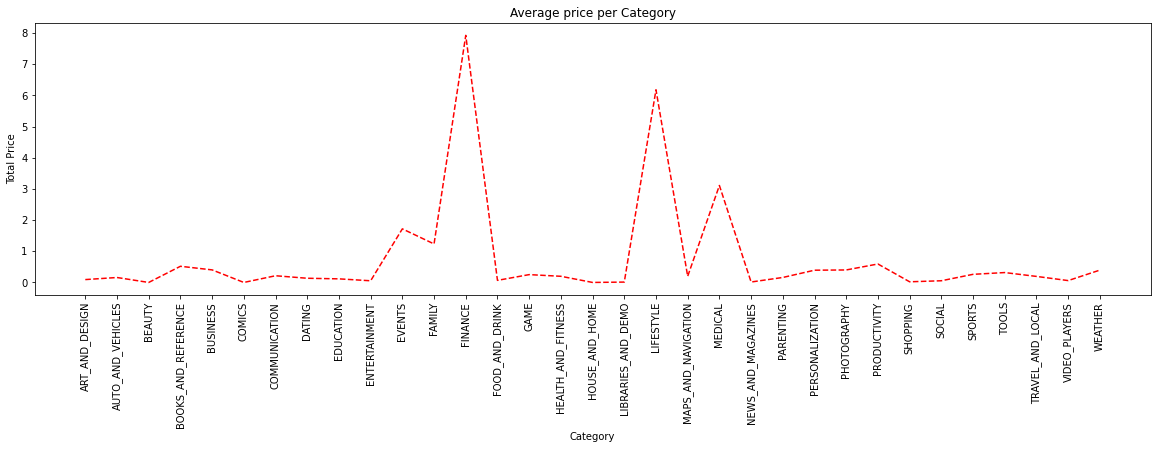

In [31]:
#Average Rating per category

plt.figure(figsize=(20,5))
plt.plot(x,'ro')
plt.xticks(rotation=90)
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

#Average Reviews per category
plt.figure(figsize=(20,5))
plt.plot(y,'g^')
plt.xticks(rotation=90)
plt.title('Average Reviews per Category')
plt.xlabel('Category')
plt.ylabel('Average Reviews')
plt.show()

#Average Price per category
plt.figure(figsize=(20,5))
plt.plot(z,'r--')
plt.xticks(rotation=90)
plt.title('Average price per Category')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.show()



- <b> The mean value of Rating is 4.2 and almost every category has average app ratings around 4
- The categories Communications, Social and Games have higher average reviews when compared to others
- The average price is higher for categories like Finance, Lifestyle and Medical </b>

### Most popular category

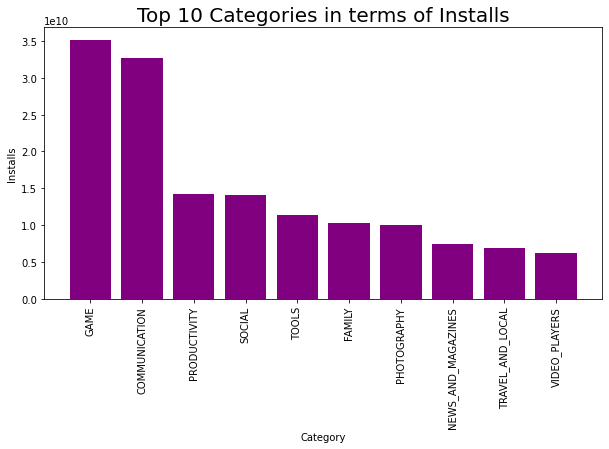

In [32]:
plt.figure(figsize=(10,5))
cat_installs = app_data.groupby('Category')['Installs'].sum().reset_index()
cat_installs_Sort = cat_installs.sort_values(by = 'Installs', ascending = False).head(10)
plt.bar("Category", "Installs", data = cat_installs_Sort, color = "purple")
plt.xticks(rotation = 90)
plt.title('Top 10 Categories in terms of Installs', size=20)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.show()

Text(0.5, 1.0, 'Boxplot of Installs VS Category')

<Figure size 1440x288 with 0 Axes>

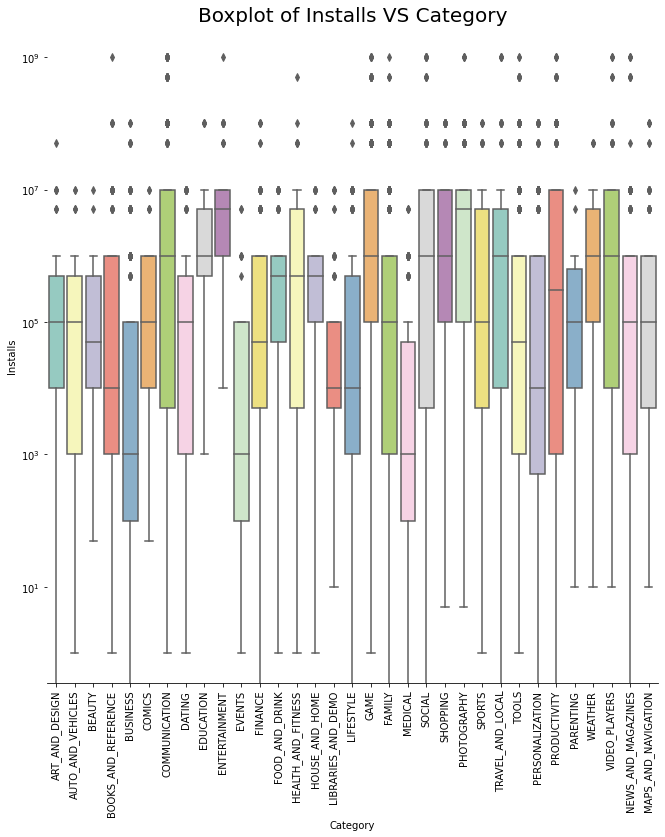

In [33]:
#Log Scaled
plt.figure(figsize=(20,4))
g = sns.catplot(x="Category",y="Installs",data=app_data, kind="box", height = 10 ,palette = "Set3")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Installs")
g.set(yscale="log")
plt.title('Boxplot of Installs VS Category',size = 20)


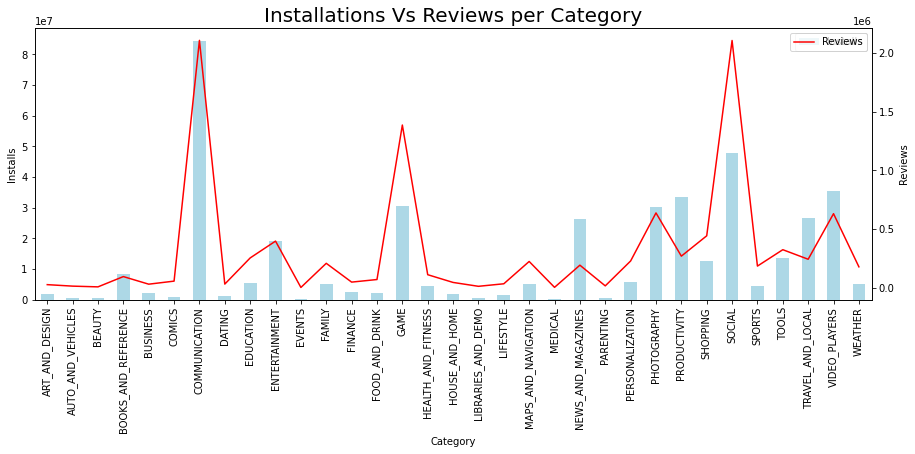

In [34]:
df_Category= app_data['Category']
Category_installs=app_data.groupby('Category')['Installs'].mean().reset_index()
Category_apps=app_data.groupby('Category')['Reviews'].mean().reset_index()

mpl.rcParams['figure.figsize']=(15,5)
fig,ax = plt.subplots()

Category_installs.plot(x="Category",ax=ax,kind='bar', color="lightblue")
ax2=ax.twinx()
Category_apps.plot(ax=ax2, color="red")
ax.set_xlabel("Category")
ax.set_ylabel("Installs")
ax2.set_ylabel("Reviews")
ax.set_title('Installations Vs Reviews per Category',size=20)
plt.show()

- <b>With almost 35 billion installations 'Games' are the most popular category followed by 'Communication'
- Upon comparing the Categories, it was observed that the categories with larger number of average reviews have larger number of installs </b>

### Comparing the Top 10 categories in terms of Installations and Number of Apps per Category

In [35]:
#finding the number of apps in each category- top 10
df3=app_data['Category'].value_counts()
df4= df3.head(10)
#finding the apps with most number of installs in each category- top 10
#p= grp['Installs'].agg(np.sum)
df5=p.sort_values(ascending=False).head(10)

In [36]:
app_data['Category'].value_counts().head(50)

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [37]:
df4

FAMILY             1972
GAME               1144
TOOLS               843
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     392
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64

In [38]:
df5

Category
GAME                  35086024415
COMMUNICATION         32647276251
PRODUCTIVITY          14176091369
SOCIAL                14069867902
TOOLS                 11452771915
FAMILY                10258263505
PHOTOGRAPHY           10088247655
NEWS_AND_MAGAZINES     7496317760
TRAVEL_AND_LOCAL       6868887146
VIDEO_PLAYERS          6222002720
Name: Installs, dtype: int64

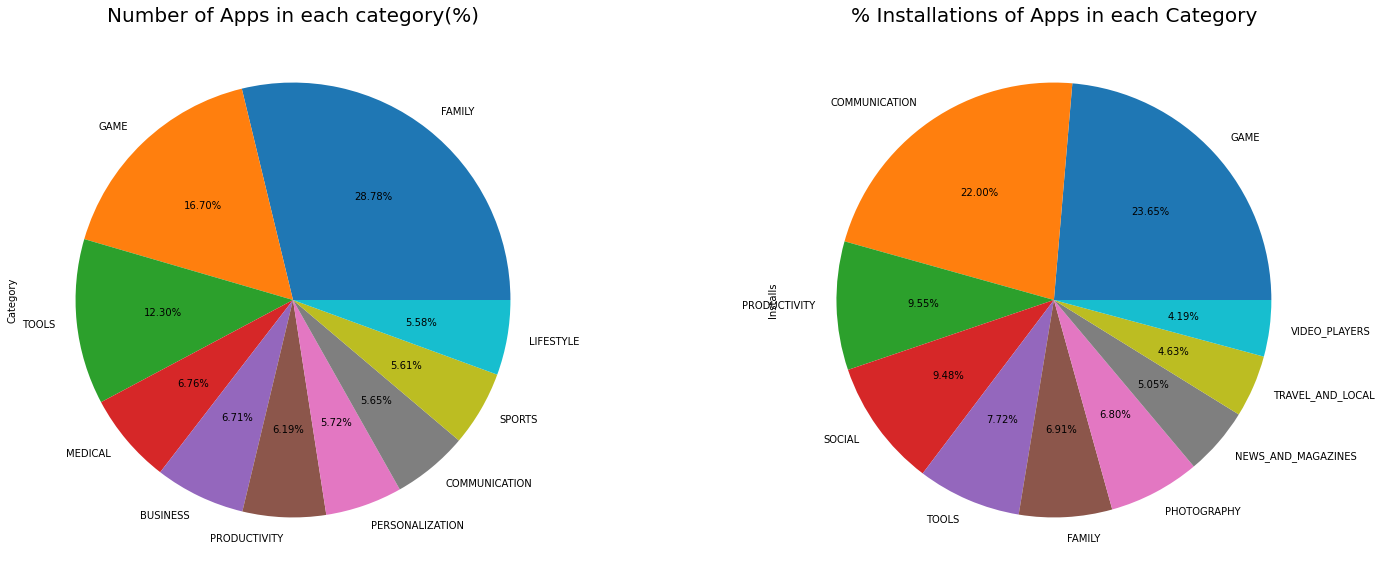

In [39]:

#comparing the number of apps and the number of installs in each category
plt.figure(figsize=(25,10))
ax1 = plt.subplot(121)
df4.plot(kind='pie', ax=ax1, autopct='%0.2f%%')
ax1.set_title('Number of Apps in each category(%)',size=20)
ax2 = plt.subplot(122)
df5.plot(kind='pie',ax=ax2,autopct='%0.2f%%')
ax2.set_title('% Installations of Apps in each Category',size=20)
plt.show()


- <b> Number of apps in the Communication category is only 5.6% where as 22% of the total installations are from this category
    - More creative apps could be developed in Communication Category which would result in increased installations
- Number of apps in the Family category is 28.78% but it contributes to only 6.9% of total installations
    - Apps in family category which not frequently used should be removed </b>

## App with largest number of Installs

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

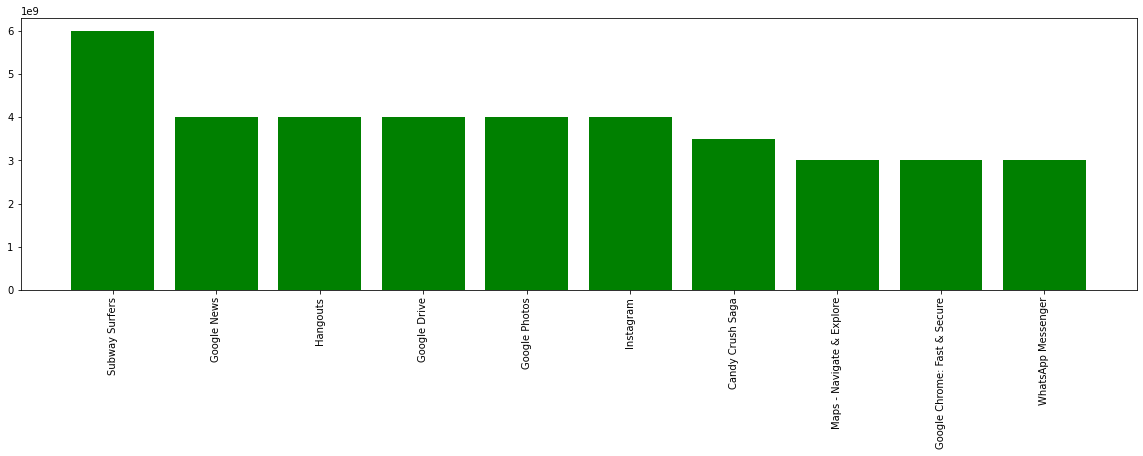

In [40]:
plt.figure(figsize=(20,5))
app_installs = app_data.groupby('App')['Installs'].sum().reset_index()
app_installs_top = app_installs.sort_values(by = 'Installs', ascending = False).head(10)
plt.bar("App", "Installs", data = app_installs_top, color = "green")
plt.xticks(rotation = 90)


- <b> The app with most number of installs is Subway Surfers, with more than 6 billion downloads followed by Google News with 4 billion downloads

## Exploring App Rating


In [41]:
mean_rating=app_data['Rating'].mean()
mean_rating

4.206476014760287

Text(0.5, 1.0, 'Distribution of Rating')

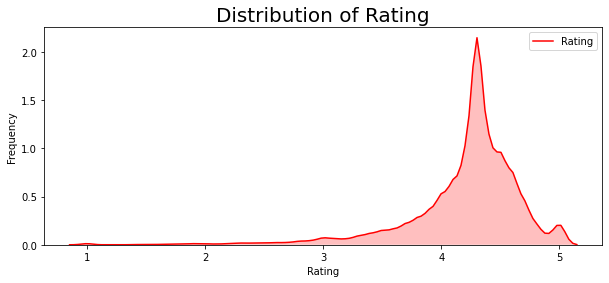

In [42]:
plt.figure(figsize=(10,4))
g = sns.kdeplot(app_data.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

No handles with labels found to put in legend.


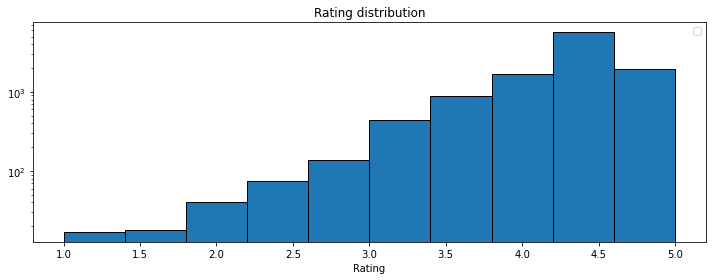

In [43]:
fig = plt.figure(figsize=(10,4)) 
plt.hist(app_data['Rating'],edgecolor = 'black', log=True)
plt.title("Rating distribution")
plt.xlabel('Rating')
plt.tight_layout()
plt.legend()

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

<Figure size 1080x288 with 0 Axes>

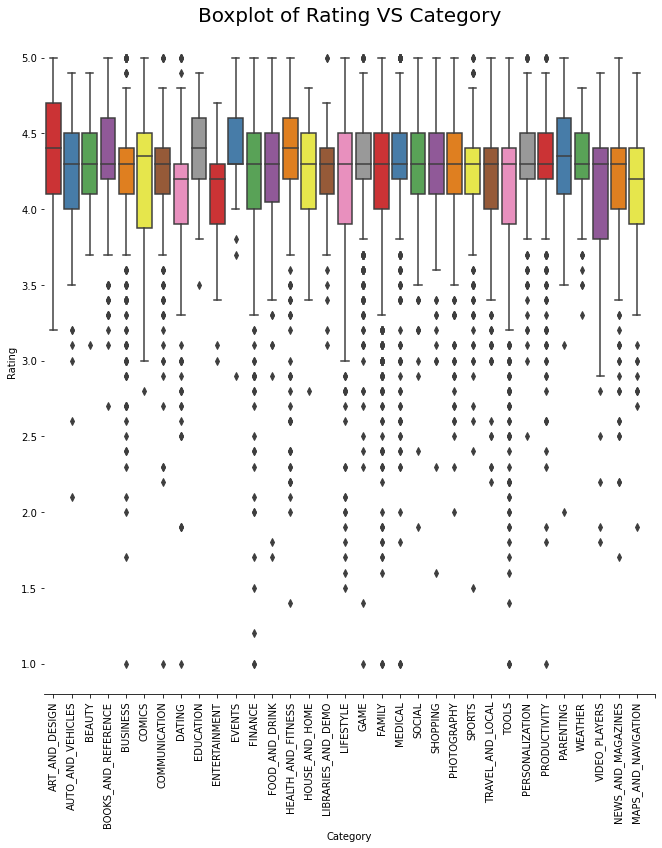

In [44]:
plt.figure(figsize=(15,4))
g = sns.catplot(x="Category",y="Rating",data=app_data, kind="box", height = 10 ,palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

- <b>Average rating of applications in Google playstore is 4.2 which is good.
- Most of the applications perform well with with rating around 4.0
- There is no significant difference in Rating of applications in each category. So almost all categories perform well in terms of rating </b>

## Free Vs Paid Apps

In [45]:
freeApps = len(app_data[app_data['Type'] == 'Free'])
print("No. of free apps = ", freeApps)

No. of free apps =  10040


In [46]:
paidApps = len(app_data) - freeApps
print("No. of paid apps = ", paidApps)

No. of paid apps =  800


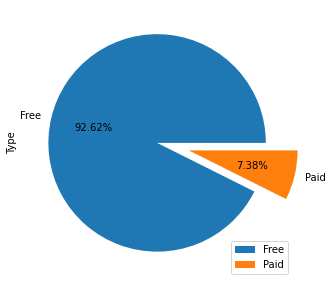

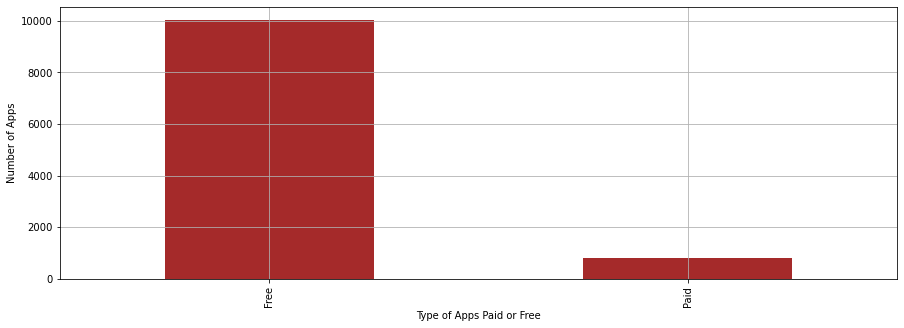

In [47]:
plt.figure(figsize = (5,5))
app_data["Type"].value_counts().plot(kind='pie',autopct = "%0.2f%%", explode=[0,0.3])
plt.legend(loc="lower right")
plt.show()
app_data["Type"].value_counts().plot(kind='bar', color="brown")
plt.grid()
plt.xlabel("Type of Apps Paid or Free")
plt.ylabel("Number of Apps")
plt.show()

In [48]:
#Average Rating Paid Vs Free
plt.figure(figsize = (20,5))

#finding the categories with most number of installs- top 10
avg_rating = app_data.groupby(['Type'])['Rating'].mean().sort_values(ascending = False).reset_index()


<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Rating VS Type')

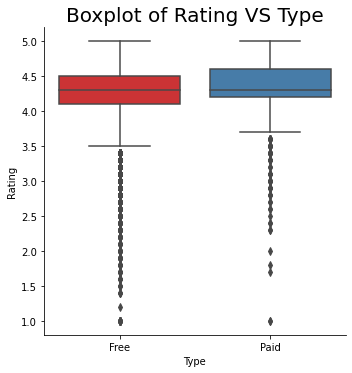

In [49]:
sns.catplot(x="Type",y="Rating",data=app_data, kind="box" ,palette = "Set1")
plt.title('Boxplot of Rating VS Type',size = 20)


Text(0.5, 1.0, 'Boxplot of Installs VS Type')

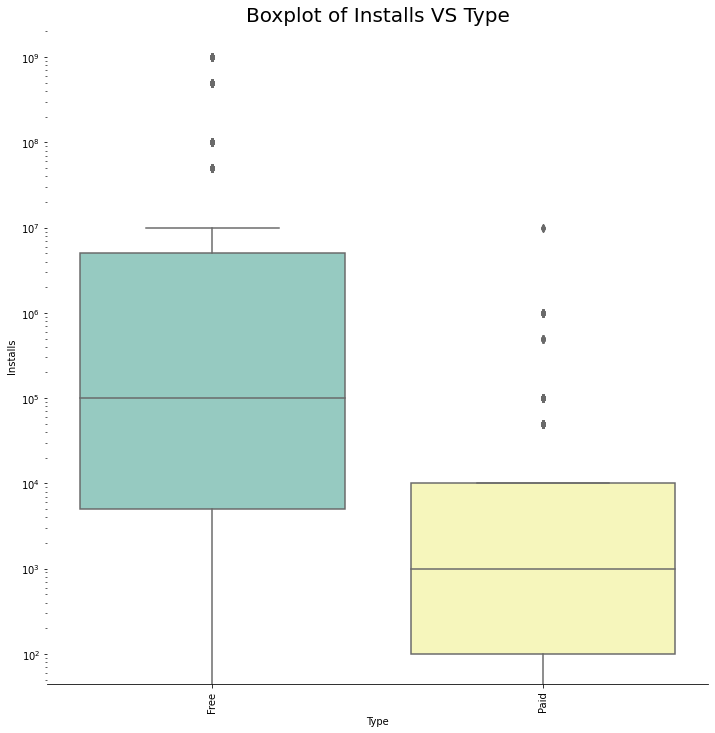

In [50]:
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(25,5)
#plt.figure(figsize=(5,5))
g = sns.catplot(x="Type",y="Installs",data=app_data, kind="box", height = 10 ,palette = "Set3")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Installs")
g.set(yscale="log")
plt.title('Boxplot of Installs VS Type',size = 20)

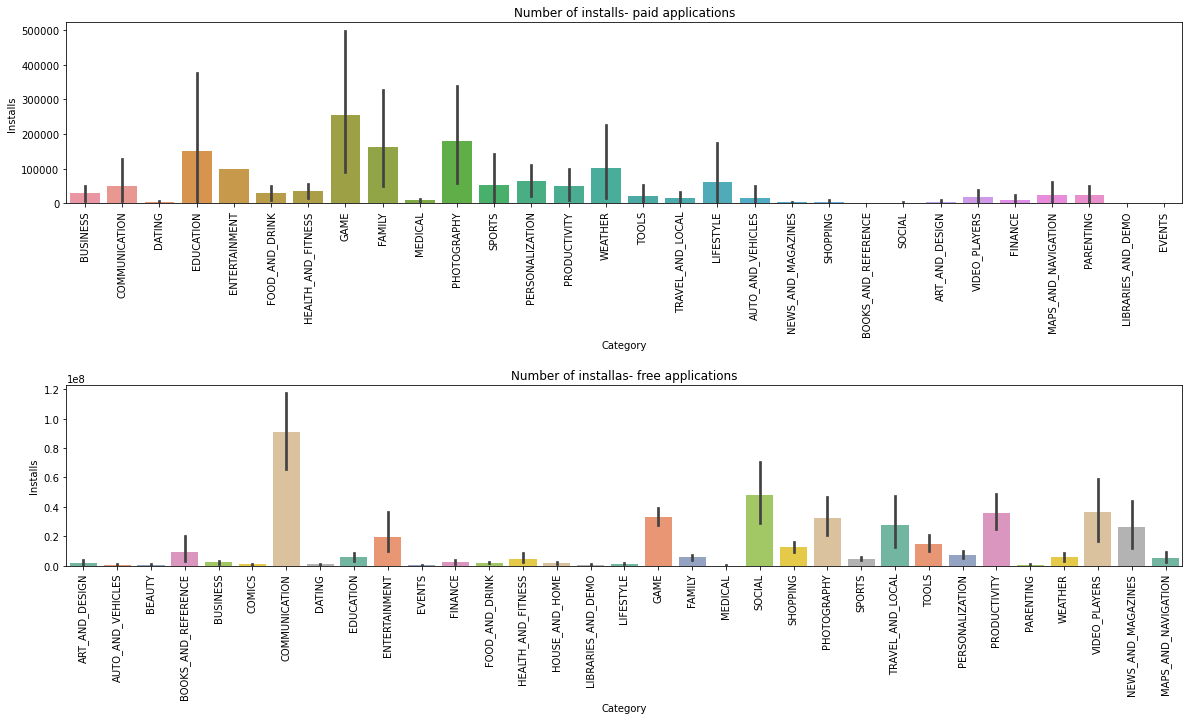

In [51]:
#Comparing the number of Installs Free Vs Paid Apps
free_data= app_data[app_data['Type']== 'Free']
paid_data= app_data[app_data['Type']== 'Paid']
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
sns.barplot(data=paid_data,x='Category',y='Installs')
plt.title('Number of installs- paid applications')
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.barplot(data=free_data,x='Category',y='Installs',palette="Set2")
plt.title('Number of installas- free applications')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=1)
plt.show()


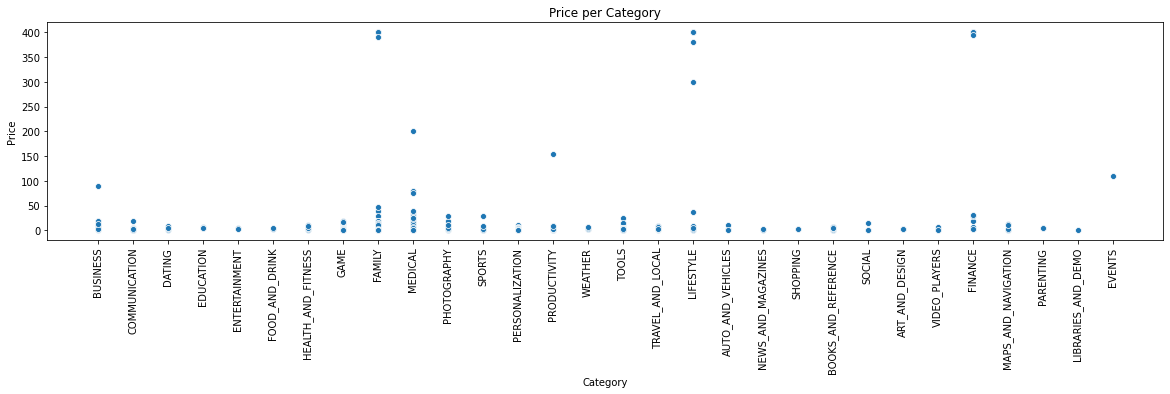

In [52]:
# Price distribution per category
plt.figure(figsize = (20,4))
sns.scatterplot(data=paid_data,x='Category',y='Price')
plt.title('Price per Category')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Average Price per Category')

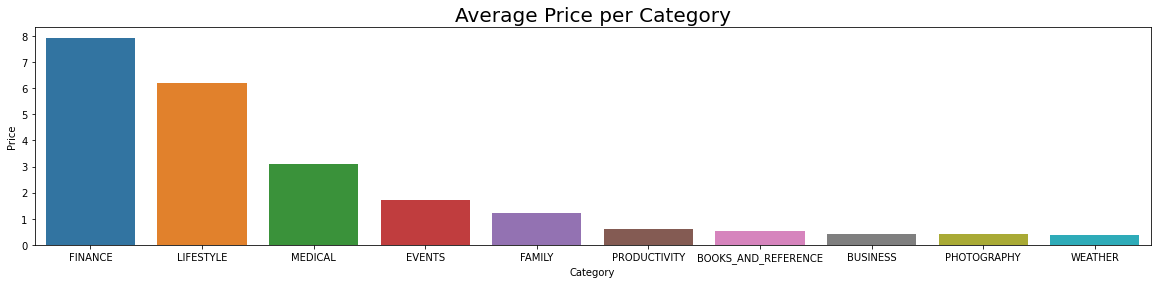

In [53]:
#Total price in each category
app_price = app_data.groupby('Category')['Price'].mean().reset_index()
app_price_top = app_price.sort_values(by = 'Price', ascending = False).head(10)
#app_price_top.plot(kind='bar',x='Category')
plt.figure(figsize = (20,4))
sns.barplot(x='Category', y='Price', data=app_price_top)
plt.title("Average Price per Category", size=20)


Text(0.5, 1.0, 'Scatter plot Rating VS Price')

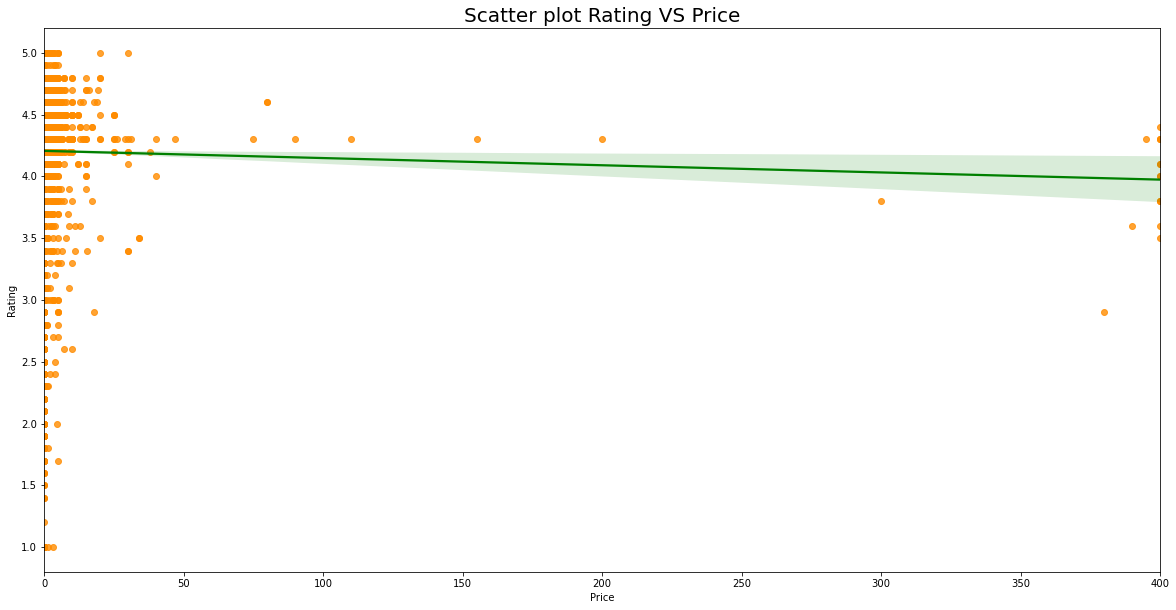

In [54]:
plt.figure(figsize = (20,10))
sns.regplot(x="Price", y="Rating", color = 'darkorange',line_kws={"color": "green"},data=app_data);
plt.title('Scatter plot Rating VS Price',size = 20)

In [55]:
app_data.loc[ app_data['Price'] == 0, 'PriceBand'] = ' Free'
app_data.loc[(app_data['Price'] > 0) & (app_data['Price'] <= 0.99), 'PriceBand'] = ' cheap'
app_data.loc[(app_data['Price'] > 0.99) & (app_data['Price'] <= 2.99), 'PriceBand']   = ' not cheap'
app_data.loc[(app_data['Price'] > 2.99) & (app_data['Price'] <= 4.99), 'PriceBand']   = ' affordable'
app_data.loc[(app_data['Price'] > 4.99) & (app_data['Price'] <= 14.99), 'PriceBand']   = ' expensive'
app_data.loc[(app_data['Price'] > 14.99) & (app_data['Price'] <= 29.99), 'PriceBand']   = ' too expensive'
app_data.loc[(app_data['Price'] > 29.99), 'PriceBand']  = ' highly expensive'

In [56]:
app_data[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,Free,4.201175
1,affordable,4.253293
2,cheap,4.298649
3,expensive,4.276423
4,highly expensive,4.045161
5,not cheap,4.294649
6,too expensive,4.262500


Text(0.5, 1.0, 'Boxen plot Rating VS PriceBand')

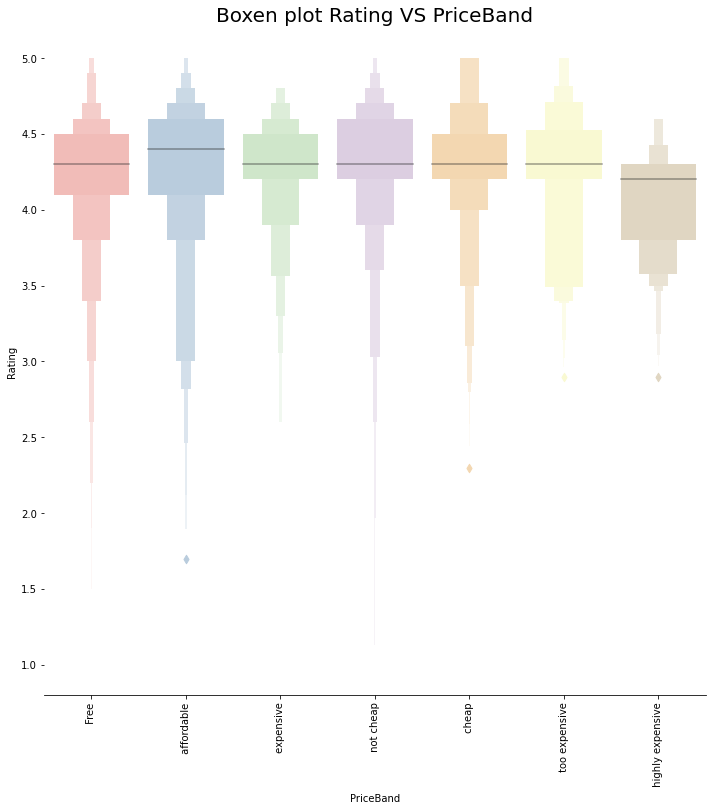

In [57]:
g = sns.catplot(x="PriceBand",y="Rating",data=app_data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)

Text(0.5, 1.0, 'Boxen plot Installs VS PriceBand')

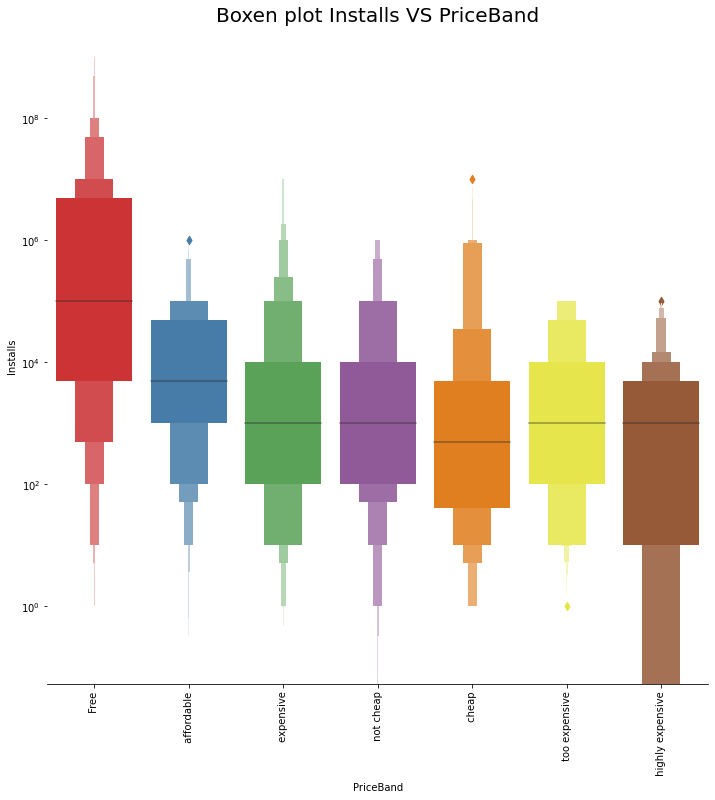

In [58]:
g = sns.catplot(x="PriceBand",y="Installs",data=app_data, kind="boxen", height = 10 ,palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(yscale="Log")
g = g.set_ylabels("Installs")
plt.title('Boxen plot Installs VS PriceBand',size = 20)


- <b>Paid apps consists of only 7.38% of the total number of applications
- The number of installs are higher for free apps when compared to paid apps
- The average rating of both free and paid apps are almost the same
- There are higher number of installs only for certain categories like Game and Family in the paid app categories
</b>
- <b> Categories like Finance, Family, Lifestyle and Medical have apps that are very expensive 
- Highly priced applications tend to have lower rating as well as less number of installs

## Finding the relationship between Rating, Installs and Days since last update of applications

In [59]:
#creating a dublicate dataset
google_data= app_data
google_data['Last Updated'][0]-google_data['Last Updated'].max()

Timedelta('-213 days +00:00:00')

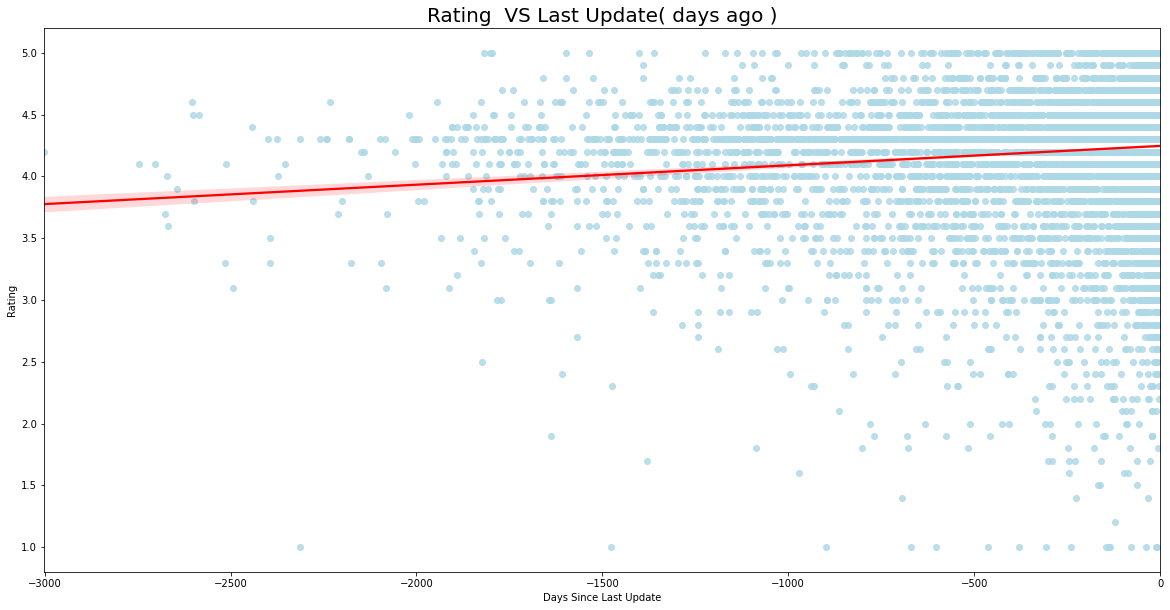

In [60]:
#Creating a new column for Days since last update
google_data['Days Since Last Update'] = (google_data['Last Updated'] -  google_data['Last Updated'].max()).dt.days
plt.figure(figsize = (20,10))
sns.regplot(x="Days Since Last Update", y="Rating", color = 'lightblue',data=google_data ,line_kws={"color": "red"})
plt.title('Rating  VS Last Update( days ago )',size = 20)
plt.show()

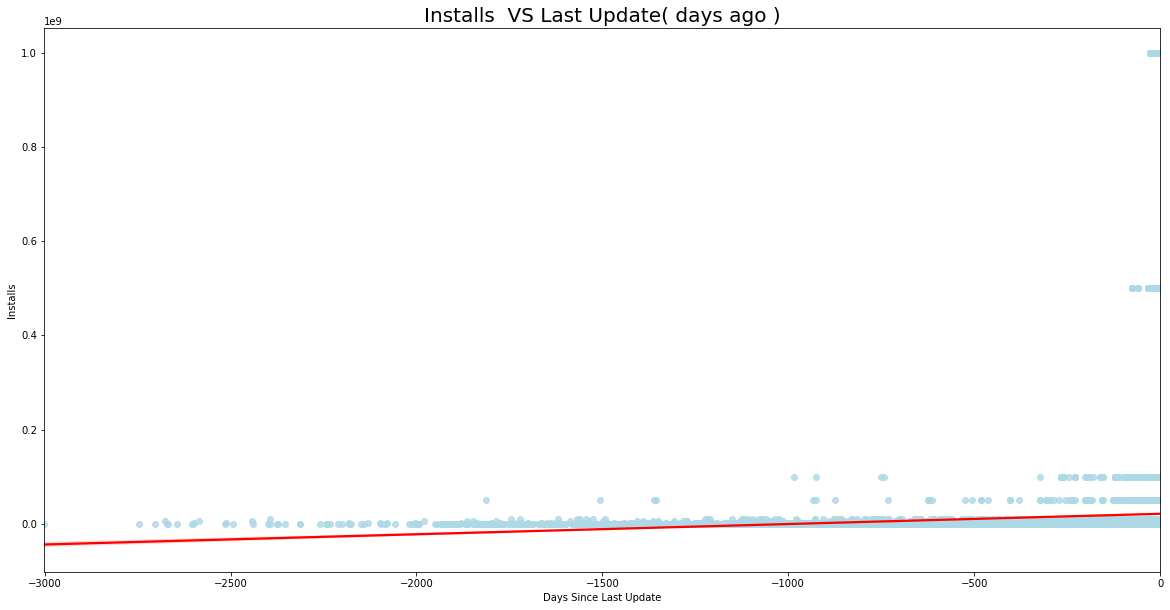

In [61]:
plt.figure(figsize = (20,10))
g=sns.regplot(x="Days Since Last Update", y="Installs",data=google_data, 
            scatter_kws={"color": "lightblue"}, line_kws={"color": "red"} )

plt.title('Installs  VS Last Update( days ago )',size = 20)
plt.show()

- <b> Ratings and Installs seems to increase for apps that are recently update

## Comparing Revenue

In [62]:
#Create a new column Revenue = Price * Installs
google_data['Revenue']= google_data.Price* google_data.Installs

In [63]:
google_revenue= google_data[google_data['Type']== 'Paid']

In [64]:
google_revenue.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Days Since Last Update,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,affordable,-136,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,affordable,-484,499000.0
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,affordable,-136,499000.0
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,affordable,-484,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,0.0,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,affordable,-34,399000.0


In [65]:
#Finding average Revenue per category
Category_Revenue= google_revenue.groupby(['Category'])['Revenue'].mean().sort_values(ascending = False).reset_index()


Text(0.5, 1.0, 'Revenue per Category')

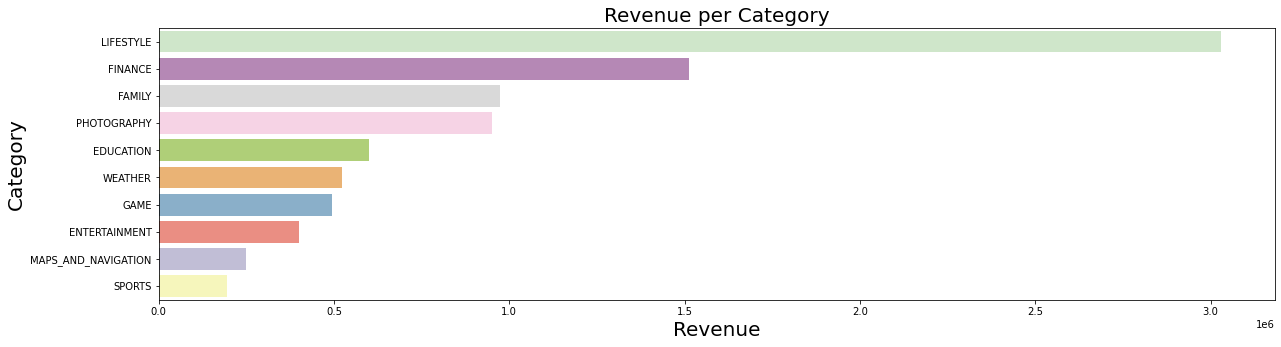

In [66]:
#Top 10 Revenue Categories
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'Revenue' , y = 'Category' , data = Category_Revenue.head(10),palette="Set3_r" )
ax.set_xlabel('Revenue', size=20)
ax.set_ylabel('Category', size=20)
ax.set_title('Revenue per Category',size=20)



Text(0.5, 1.0, 'Revenue per Categry')

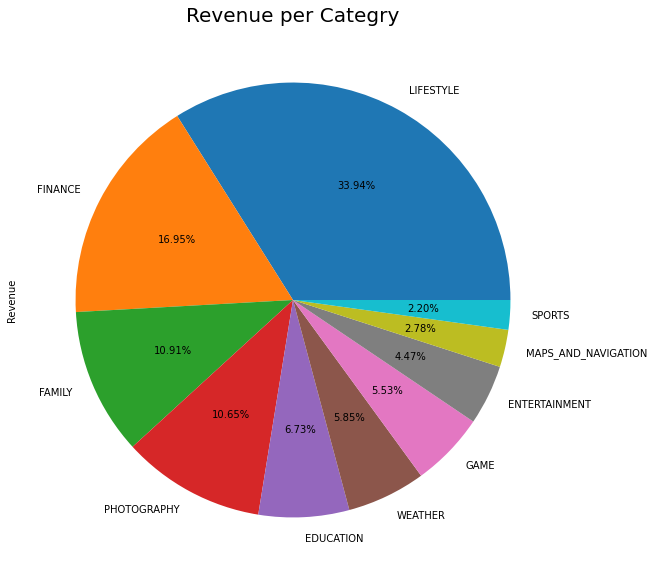

In [67]:
plt.figure(figsize=(20,10))
Category_Revenue['Revenue'].head(10).plot(kind='pie', autopct='%0.2f%%', labels= Category_Revenue['Category'])
plt.title('Revenue per Categry' ,size = 20)

- <b> More than 50% of the Revenue comes from the categories Lifestyle, Finance and Family
- Revenue from Lifestyle application are the highest which is more than 30 Million

## Analyzing Size

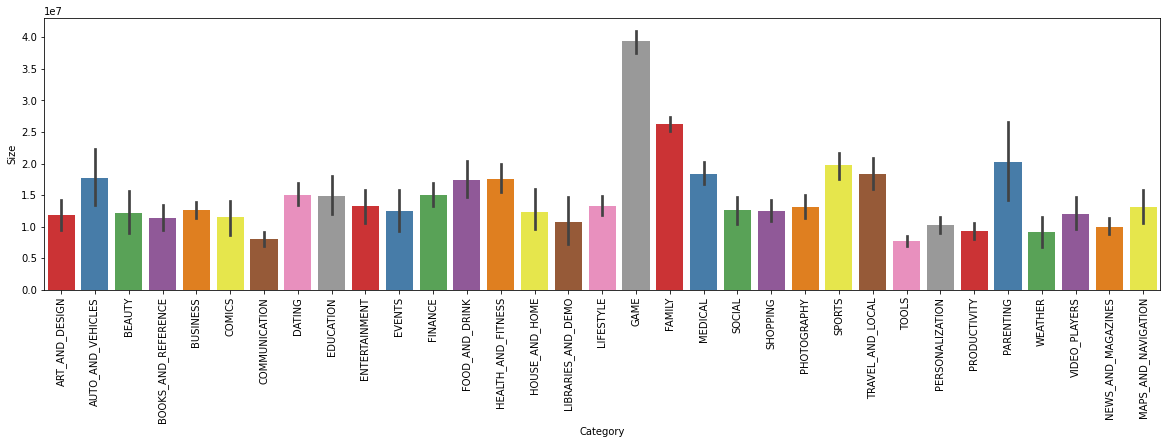

In [68]:
plt.figure(figsize=(20,5))
app_installs = app_data.groupby('Category')['Size'].mean().reset_index()
g=sns.barplot(x="Category", y="Size", palette = "Set1",data=app_data)
plt.xticks(rotation = 90)
plt.show()

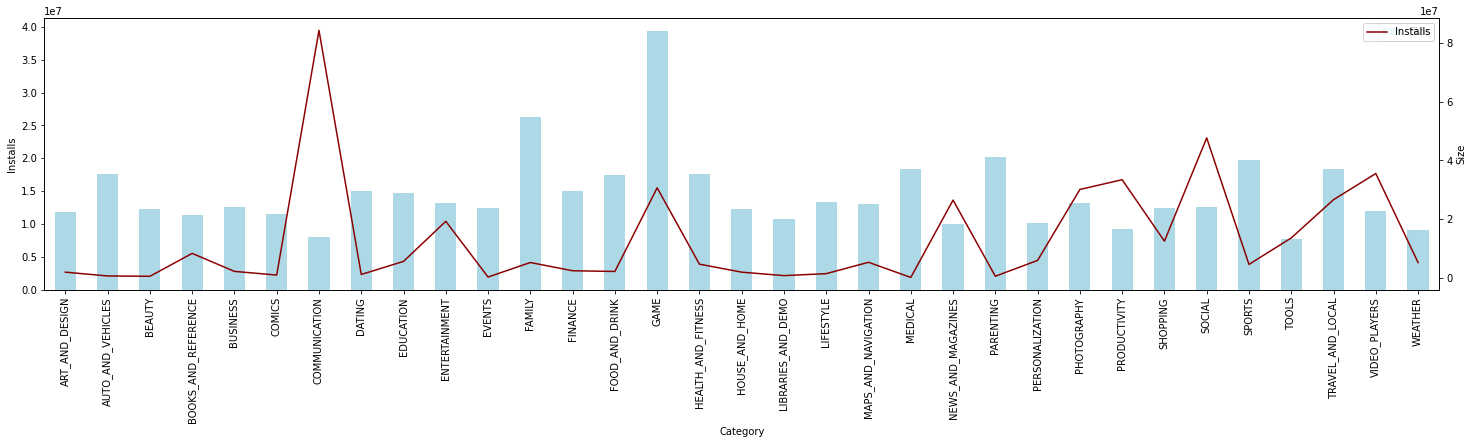

In [69]:
category_installs=app_data.groupby('Category')['Installs'].mean().reset_index()
fig,ax = plt.subplots()
app_installs.plot(x="Category",ax=ax,kind='bar', color="lightblue")
ax2=ax.twinx()
category_installs.plot(ax=ax2, color="darkred")
ax.set_xlabel("Category")
ax.set_ylabel("Installs")
ax2.set_ylabel("Size")
plt.show()

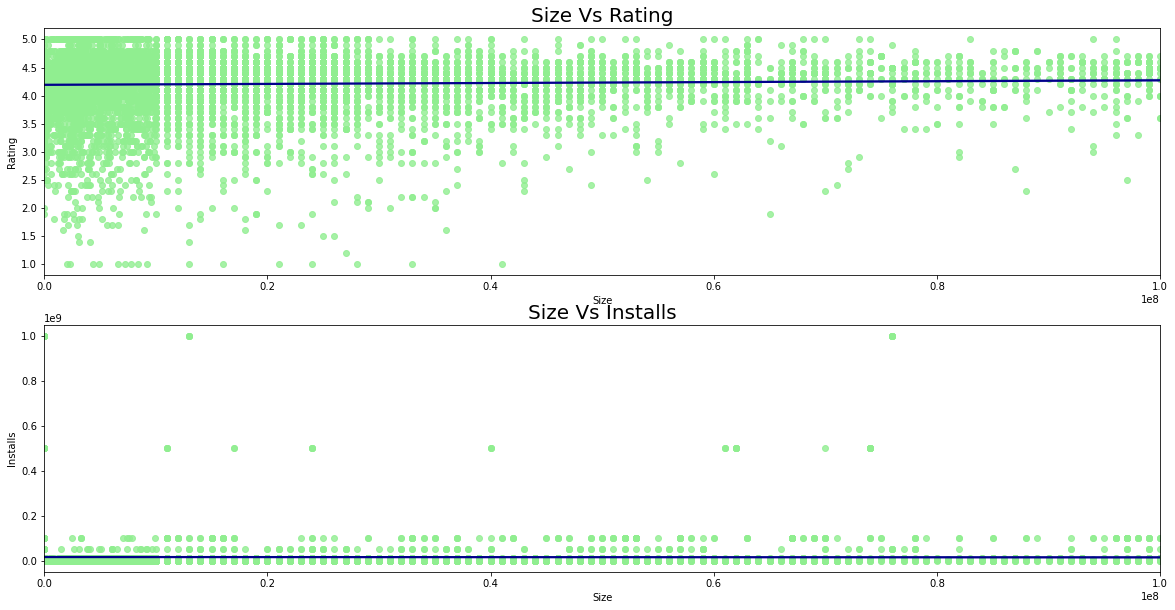

In [70]:
plt.figure(figsize = (20,10))
plt.subplot(2, 1, 1)
g=sns.regplot(x="Size", y="Rating",data=google_data, 
            scatter_kws={"color": "lightgreen"}, line_kws={"color": "darkblue"} )
plt.title('Size Vs Rating',size = 20)

plt.subplot(2, 1, 2)
g=sns.regplot(x="Size", y="Installs",data=google_data, 
            scatter_kws={"color": "lightgreen"}, line_kws={"color": "darkblue"} )
plt.title('Size Vs Installs',size = 20)
plt.show()



- <b> Games,Family and Parenting Apps are bulky when compared to other applications
- Size does not seem to affect Rating and Installs

## Content Rating

<Figure size 1440x288 with 0 Axes>

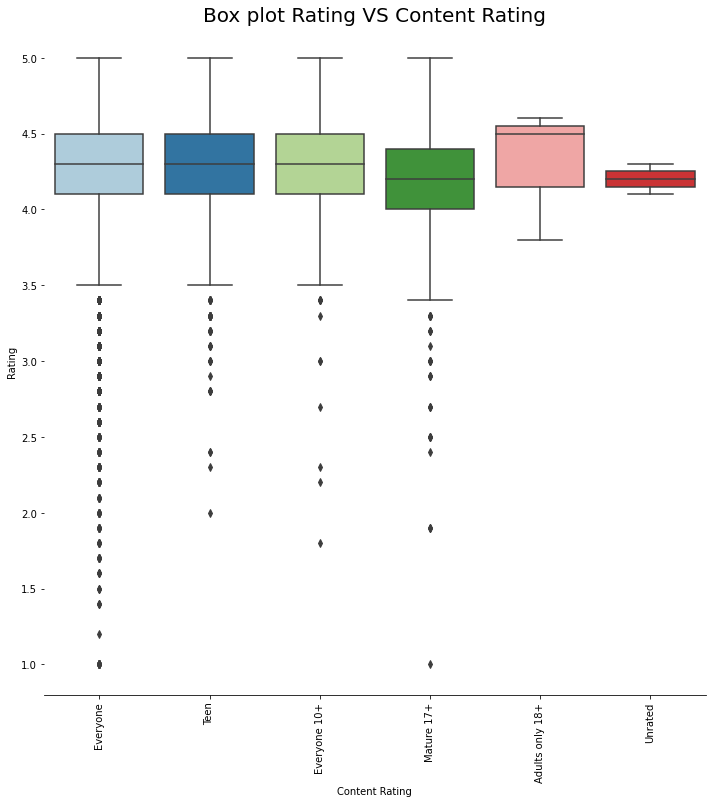

In [71]:
plt.figure(figsize=(20,4))
g = sns.catplot(x="Content Rating",y="Rating",data=app_data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)
plt.show()

Text(0.5, 1.0, 'Boxplot of Installs VS Content Rating')

<Figure size 1440x288 with 0 Axes>

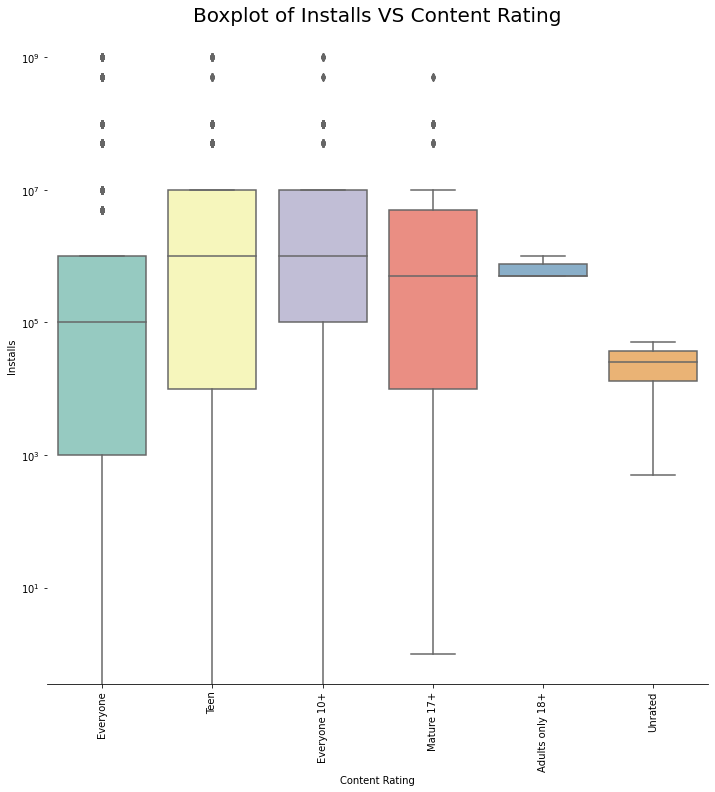

In [72]:
plt.figure(figsize=(20,4))
g = sns.catplot(x="Content Rating",y="Installs",data=app_data, kind="box", height = 10 ,palette = "Set3")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Installs")
g.set(yscale="log")
plt.title('Boxplot of Installs VS Content Rating',size = 20)

In [73]:
app_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Days Since Last Update,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Free,-213,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Free,-205,0.0


In [74]:

df_Content= app_data['Content Rating']
content_installs=app_data.groupby('Content Rating')['Installs'].mean().reset_index()
content_apps=app_data.groupby('Content Rating')['App'].count().reset_index()



<Figure size 1440x288 with 0 Axes>

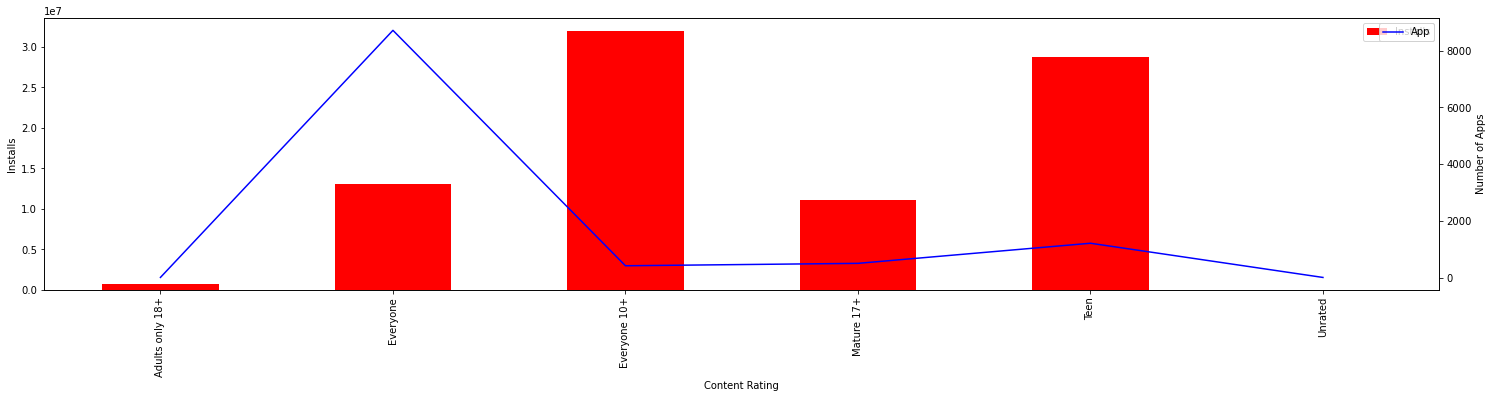

In [75]:
plt.figure(figsize=(20,4))
fig,ax = plt.subplots()
content_installs.plot(x="Content Rating",ax=ax,kind='bar', color="red")
ax2=ax.twinx()
content_apps.plot(ax=ax2, color="blue")
ax.set_xlabel("Content Rating")
ax.set_ylabel("Installs")
ax2.set_ylabel("Number of Apps")
plt.show()

- <b> There seems to be good rating across all the content Rating
- Teen and Everyone 10+ seems to have larger number of Installs
-The number of apps for Teens seems to be very less but there are larger number of installs so creating more applications intended for Teenagers would be beneficial

## Android Version Comaprison

Text(0.5, 1.0, 'Boxplot of Installs VS Android Ver')

<Figure size 1440x288 with 0 Axes>

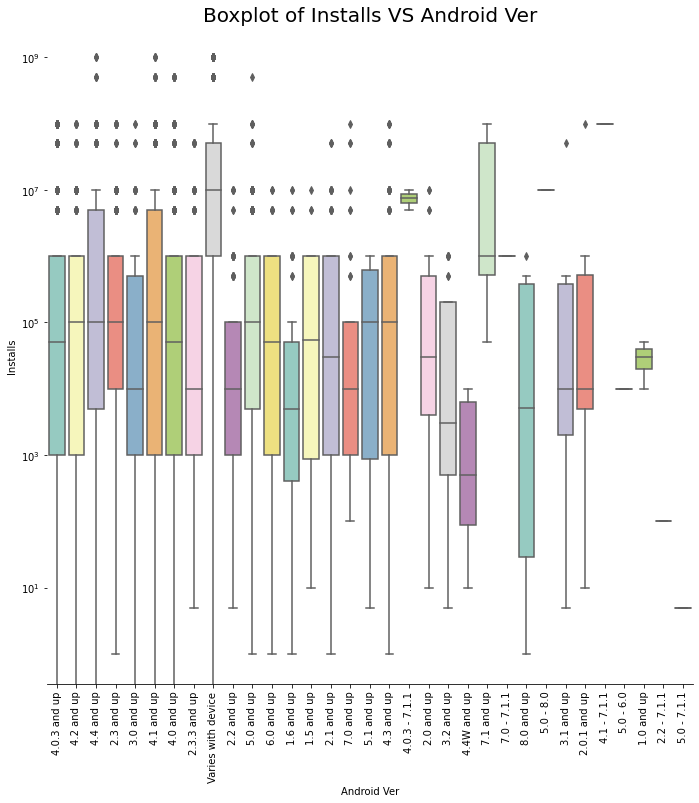

In [76]:
plt.figure(figsize=(20,4))
g = sns.catplot(x="Android Ver",y="Installs",data=app_data, kind="box", height = 10 ,palette = "Set3")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Installs")
g.set(yscale="log")
plt.title('Boxplot of Installs VS Android Ver',size = 20)

Text(0.5, 1.0, 'Boxplot of Rating VS Android Ver')

<Figure size 1440x288 with 0 Axes>

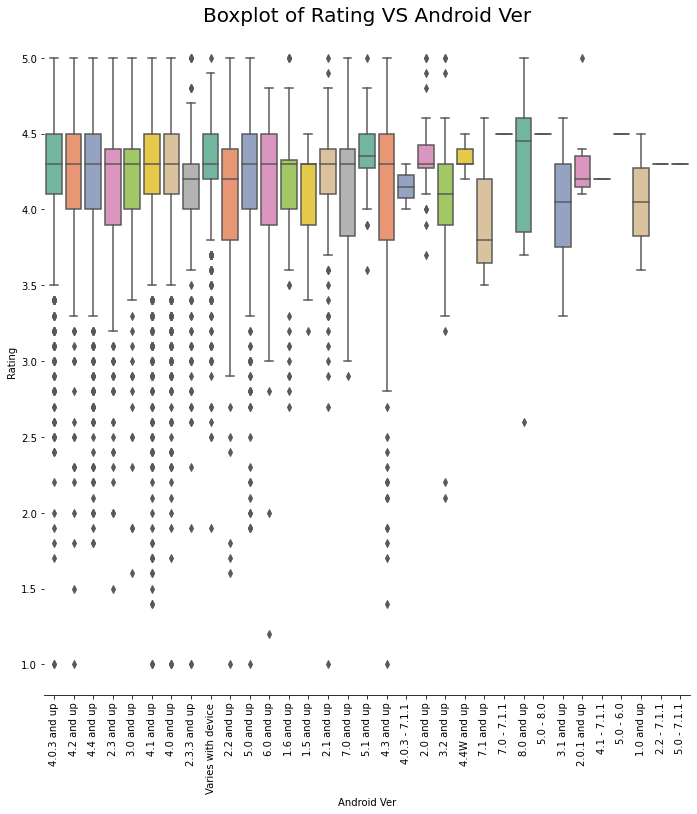

In [77]:
plt.figure(figsize=(20,4))
g = sns.catplot(x="Android Ver",y="Rating",data=app_data, kind="box", height = 10 ,palette = "Set2")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Android Ver',size = 20)

## Part II: <span style="color:blue"> Inferential Statistical Analysis</span>

##  <span style="color:purple">Correlation and Regression</span> 

In [78]:
#Create Correlation matrix for all the numerical variables
df_corr= google_data[['Rating', 'Reviews', 'Size',
       'Installs','Price','Days Since Last Update','Revenue']]

In [79]:
df_corrmatrix=df_corr.corr()
df_corrmatrix

,Rating,Reviews,Size,Installs,Price,Days Since Last Update,Revenue
Rating,1.000000,0.063166,0.037086,0.045496,-0.019318,0.128946,0.009065
Reviews,0.063166,1.000000,0.065458,0.643122,-0.009667,0.085288,0.005094
Size,0.037086,0.065458,1.000000,-0.003457,-0.013457,0.144826,-0.008727
Installs,0.045496,0.643122,-0.003457,1.000000,-0.011689,0.100914,-0.004503
Price,-0.019318,-0.009667,-0.013457,-0.011689,1.000000,-0.006864,0.194457
Days Since Last Update,0.128946,0.085288,0.144826,0.100914,-0.006864,1.000000,0.005186
Revenue,0.009065,0.005094,-0.008727,-0.004503,0.194457,0.005186,1.000000


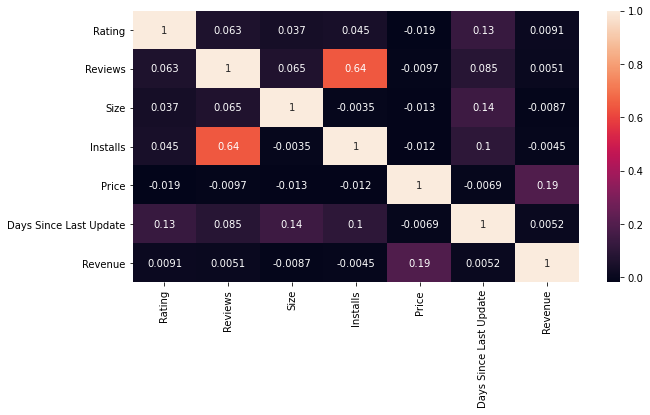

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(df_corrmatrix, annot= True )
plt.show()

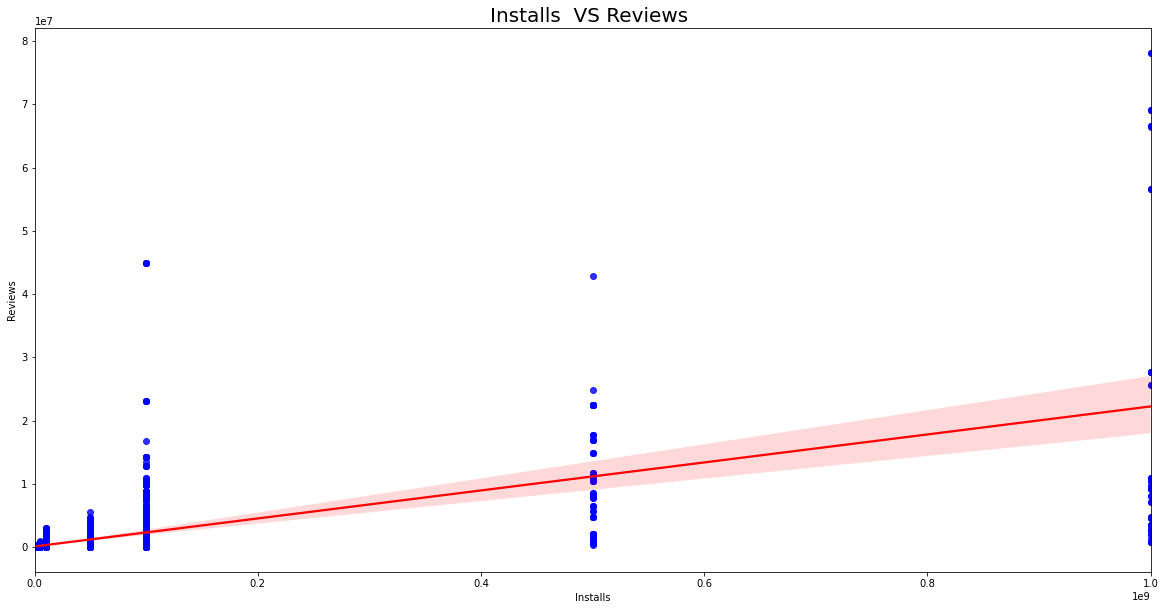

In [81]:
plt.figure(figsize = (20,10))
sns.regplot(x="Installs", y="Reviews",data=app_data,
           scatter_kws={"color": "blue"}, line_kws={"color": "red"} )

plt.title('Installs  VS Reviews ',size = 20)
plt.show()

- <b> A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.
    
- This also means that many active users who download an app usually also leave back a review or feedback.
    
- So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

In [82]:
df_corr.head(2)

,Rating,Reviews,Size,Installs,Price,Days Since Last Update,Revenue
0,4.1,159,19000000.0,10000,0.0,-213,0.0
1,3.9,967,14000000.0,500000,0.0,-205,0.0


## Using OLS Regression Model in the statsmodel.api library, to create a regression equation that models App Rating  (Y-Variable) against all your independent variables


In [83]:
X= df_corr.drop('Rating', axis=1)
Y_var1= df_corr[['Rating']]
X_var1 = sm.add_constant(X)
Y_var1.head()

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


In [84]:
model1 = sm.OLS(Y_var1,X_var1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     36.99
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.17e-44
Time:                        12:24:08   Log-Likelihood:                -7322.4
No. Observations:               10840   AIC:                         1.466e+04
Df Residuals:                   10833   BIC:                         1.471e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4

## Dummy Variables and Encoding for the Categorical Data


- <b> For the Type Column we will perform the get_dummies() inorder to get the dummy variables for free and paid type

In [85]:
application_data= app_data.copy()

In [86]:
# Creating dummy variables for Type
dummy_type=pd.get_dummies(application_data["Type"])

In [87]:
#Adding the dummy_column to the dataframe
application_data=pd.concat([application_data,dummy_type],axis=1)

In [88]:
#Dropping the original Type column
application_data.drop(["Type"],axis=1,inplace=True)

In [89]:
application_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Days Since Last Update,Revenue,Free,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Free,-213,0.0,1,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Free,-205,0.0,1,0


- <b> For the Category column, we will perform the label encoding and not the dummies, since by making dummies there will be too many extra columns added to our feature matrix that is not required, so label encoding is done by providing numerical values to each and every category of application.

In [90]:
 
application_data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [91]:
# Importing the required library
from sklearn.preprocessing import LabelEncoder

In [92]:
# Instantiating the encoder
labelencoder2 = LabelEncoder()

In [93]:
#Encoding the Ctegory column using scikit learn
application_data['Categories_encoded'] = labelencoder2.fit_transform(application_data['Category'])

In [94]:
# finally dropping the Type column, since we have the encoded numerical column.
application_data.drop(["Category"],axis=1,inplace=True)

In [95]:
application_data.tail(2)

,App,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Days Since Last Update,Revenue,Free,Paid,Categories_encoded
10839,The SCP Foundation DB fr nn5n,4.5,114,0.0,1000,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,Free,-1297,0.0,1,0,3
10840,iHoroscope - 2018 Daily Horoscope & Astrology,4.5,398307,19000000.0,10000000,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,Free,-14,0.0,1,0,18


- <b> For the Content Rating column also, we will do label encoding 

In [96]:
labelencoder = LabelEncoder()
application_data['Content_Rating_encoded'] = labelencoder.fit_transform(application_data['Content Rating'])
application_data.drop(["Content Rating"],axis=1,inplace=True)

In [97]:
application_data.head(2)

,App,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,PriceBand,Days Since Last Update,Revenue,Free,Paid,Categories_encoded,Content_Rating_encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,10000,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Free,-213,0.0,1,0,0,1
1,Coloring book moana,3.9,967,14000000.0,500000,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Free,-205,0.0,1,0,0,1


In [98]:
 
application_data.drop(['Genres','App','Last Updated','Current Ver','Android Ver'], axis=1, inplace=True)


In [99]:
application_data.drop(['PriceBand'], axis=1, inplace=True)

In [100]:
application_data.dtypes

Rating                    float64
Reviews                     int64
Size                      float64
Installs                    int64
Price                     float64
Days Since Last Update      int64
Revenue                   float64
Free                        uint8
Paid                        uint8
Categories_encoded          int64
Content_Rating_encoded      int64
dtype: object

In [101]:
corr_application_data=application_data.corr()
corr_application_data

,Rating,Reviews,Size,Installs,Price,Days Since Last Update,Revenue,Free,Paid,Categories_encoded,Content_Rating_encoded
Rating,1.000000,0.063166,0.037086,0.045496,-0.019318,0.128946,0.009065,-0.039095,0.039095,-0.033509,0.014232
Reviews,0.063166,1.000000,0.065458,0.643122,-0.009667,0.085288,0.005094,0.041699,-0.041699,0.002162,0.069963
Size,0.037086,0.065458,1.000000,-0.003457,-0.013457,0.144826,-0.008727,0.008643,-0.008643,-0.125952,0.134977
Installs,0.045496,0.643122,-0.003457,1.000000,-0.011689,0.100914,-0.004503,0.051038,-0.051038,0.022532,0.054431
Price,-0.019318,-0.009667,-0.013457,-0.011689,1.000000,-0.006864,0.194457,-0.228200,0.228200,-0.011941,-0.016196
Days Since Last Update,0.128946,0.085288,0.144826,0.100914,-0.006864,1.000000,0.005186,0.186610,-0.186610,-0.012276,0.062875
Revenue,0.009065,0.005094,-0.008727,-0.004503,0.194457,0.005186,1.000000,-0.119151,0.119151,-0.008565,0.005000
Free,-0.039095,0.041699,0.008643,0.051038,-0.228200,0.186610,-0.119151,1.000000,-1.000000,-0.018194,0.050162
Paid,0.039095,-0.041699,-0.008643,-0.051038,0.228200,-0.186610,0.119151,-1.000000,1.000000,0.018194,-0.050162
Categories_encoded,-0.033509,0.002162,-0.125952,0.022532,-0.011941,-0.012276,-0.008565,-0.018194,0.018194,1.000000,-0.093125


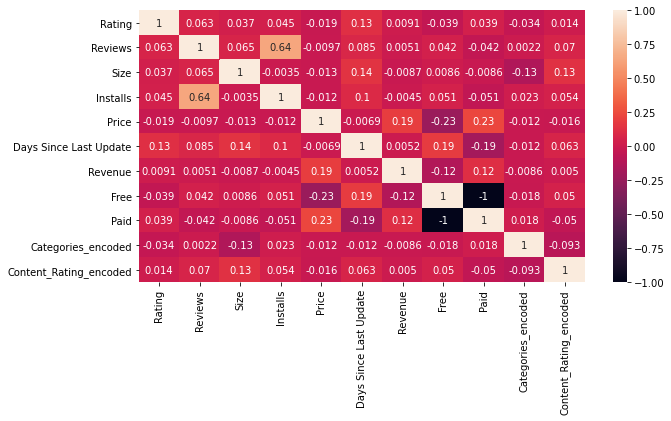

In [102]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_application_data, annot= True )
plt.show()



### Using the OLS Regression Model in the statsmodel.api library, to create a regression equation that models the Rating (Y-Variable) against all  independent variables after transforming the categorical variables to numeric 

In [103]:
X1= application_data.drop('Rating', axis=1)
Y1_var= application_data[['Rating']]
X1_var = sm.add_constant(X1)


In [104]:
model1 = sm.OLS(Y1_var,X1_var).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     32.26
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.77e-56
Time:                        12:24:09   Log-Likelihood:                -7288.9
No. Observations:               10840   AIC:                         1.460e+04
Df Residuals:                   10830   BIC:                         1.467e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

### Using the OLS Regression Model in the statsmodel.api library, to create a regression equation that models the Installs (Y-Variable) against all  independent variables afte transforming the categorical variables to numeric 

In [105]:
X2= application_data.drop('Installs', axis=1)
Y2_var= application_data[['Installs']]
X2_var = sm.add_constant(X2)

model2 = sm.OLS(Y2_var,X2_var).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     868.6
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:24:09   Log-Likelihood:            -2.1036e+05
No. Observations:               10840   AIC:                         4.207e+05
Df Residuals:                   10830   BIC:                         4.208e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    4.0

In [106]:
# After Removing Revenue and Reviews 
X3= application_data.drop(['Installs','Revenue','Reviews'], axis=1)
Y3_var= application_data[['Installs']]
X3_var = sm.add_constant(X3)
Y3_var.head()

model3 = sm.OLS(Y2_var,X2_var).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     868.6
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:24:09   Log-Likelihood:            -2.1036e+05
No. Observations:               10840   AIC:                         4.207e+05
Df Residuals:                   10830   BIC:                         4.208e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    4.0

## Creating Dummy Varibles for other Categorical Data

In [107]:
app_df= app_data.copy()
#Finding the number od rows in each catefory
app_df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [108]:
app_df.loc[~app_df.Category.isin(['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS',
                              'PRODUCTIVITY','PERSONALIZATION','COMMUNICATION',
                              'SPORTS','LIFESTYLE','EDUCATION','ENTERTAINMENT']), 'Category'] = 'other'


In [109]:
#Use pd.get_dummy() to create dummy variables for Category
dummy_Category=pd.get_dummies(app_df["Category"])
app_df=pd.concat([app_df,dummy_Category],axis=1)


In [110]:
#Create dummy variables for Content Rating
app_df['Content Rating'].value_counts().head(50)

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [111]:
dummy_Content=pd.get_dummies(app_df["Content Rating"])
app_df=pd.concat([app_df,dummy_Content],axis=1)

In [112]:
#Create dummy variables for Android Version
app_df['Android Ver'].value_counts().head(50)

4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [113]:
#Relabel every Android Ver other than top 5 as 'Other'
app_df.loc[~app_df['Android Ver'].isin(['4.1 and up','4.0.3 and up','4.0 and up'
                                ,'Varies with device','4.4 and up']), 'Android Ver'] = 'other'

In [114]:
dummy_Android=pd.get_dummies(app_df["Android Ver"])
app_df=pd.concat([app_df,dummy_Android],axis=1)

In [115]:
#Create dummy variables for Type
dummy_free=pd.get_dummies(app_df["Type"])
app_df=pd.concat([app_df,dummy_free],axis=1)


In [116]:
#Drop all the colums that are non numeric
app_df.drop(['App','Category','Type','Content Rating',
         'Genres','Last Updated','Current Ver','Android Ver','PriceBand','Revenue'], axis=1, inplace=True)

### Using the OLS Regression Model in the statsmodel.api library, to create a regression equation that models the Rating (Y-Variable) against all  independent variables afte transforming the categorical variables to numeric 

In [117]:
#OLS Regression for the modified dataset- Rating
X6= app_df.drop('Rating', axis=1)
Y6_var= app_df[['Rating']]
X6_var = sm.add_constant(X6)
model6 = sm.OLS(Y6_var,X6_var).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     18.90
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           1.82e-91
Time:                        12:24:10   Log-Likelihood:                -7173.2
No. Observations:               10840   AIC:                         1.440e+04
Df Residuals:                   10811   BIC:                         1.462e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

### Using the OLS Regression Model in the statsmodel.api library, to create a regression equation that models the Installs (Y-Variable) against all  independent variables afte transforming the categorical variables to numeric 

In [118]:
#OLS Regression for the modified dataset -Installs
X7= app_df.drop('Installs', axis=1)
Y7_var= app_df[['Installs']]
X7_var = sm.add_constant(X7)

model7 = sm.OLS(Y7_var,X7_var).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:               Installs   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     307.2
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:24:10   Log-Likelihood:            -2.1013e+05
No. Observations:               10840   AIC:                         4.203e+05
Df Residuals:                   10811   BIC:                         4.205e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   4.63

- <b> For the Category column, we will perform the label encoding and not the dummies, since by making dummies there will be too many extra columns added to our feature matrix that is not required, so label encoding is done by providing numerical values to each and every category of application.

## Download Cleaned Dataset as csv file

In [119]:
#Saving the cleaned data as a csv file
google_data.to_csv('google_data_cleaned.csv', index=False)